In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import norm
import math

In [86]:
def doorsfiller(n):
    rand_doors = np.zeros(int(n)) #vettore di tutti zeri (capre)
    rand_index = np.random.randint(0,int(n)) #indice casuale dove si troverà la macchina
    rand_doors[rand_index] = 1 #metto la macchina nella posizione data dall'indice casuale
    return rand_doors

In [48]:
doors_n = doorsfiller(3)
print (doors_n)

[1. 0. 0.]


In [49]:
doors = np.array([0,0,1]) #0=capra, 1=lambo
d = np.array([0,1,2])

In [50]:
choose = np.random.randint(0,3) #esclude il 3 quindi scelta a caso tra 0,1,2
print(choose)

2


In [41]:
host = np.delete(d,choose)
print(host)

[0 2]


In [38]:
#switcher
if doors[host[0]] == 0:
    choose_def = host[1]
    host_def = host[0]
else:
    choose_def = host[0]
    host_def = host[1]

print(doors[choose_def])
print(host_def)      

1
0


In [ ]:
#newcomer
new = np.rand.randint()

# Con ciclo for per diversa scelta MA stessa "posizone delle porte":

In [81]:
count_s = []
count_c = []
count_n = []

for i in range(0,1000):
    choose_s = np.random.randint(0,3) #Switcher (randint esclude il 3 quindi scelta a caso tra 0,1,2)
    choose_c = np.random.randint(0,3) #conservative
    host = np.delete(d,choose_s) #va bene definito per lo switcher perchè per il conservative non cambia nulla
    if doors[host[0]] == 0: #Ciclo per giocatore switcher (va bene! non pensarci)
        choose_def_s = host[1]
        host_def = host[0]
    else:
        choose_def_s = host[0]
        host_def = host[1]
    choose_n = np.delete(d,host_def)[np.random.randint(len(d)-1)] #scelta ne newcomer
    
    count_s.append(doors[choose_def_s])
    count_c.append(doors[choose_c])
    count_n.append(doors[choose_n])

count_s = np.array(count_s)
count_c = np.array(count_c)
count_n = np.array(count_n)
#print(count_s, "\n", count_c, "\n", count_n)

In [82]:
p_winn_s = (len(count_s[count_s==1])/len(count_s))
p_winn_c = (len(count_c[count_c==1])/len(count_c))
p_winn_n = (len(count_n[count_n==1])/len(count_n))

print(p_winn_s, "\n", p_winn_c, "\n", p_winn_n)

0.677 
 0.331 
 0.505


# Ciclo per diverse scelte E posizione porte casuale

In [84]:
doors_n = doorsfiller(3)
print (doors_n)

count_s = []
count_c = []
count_n = []

for i in range(0,1000):
    choose_s = np.random.randint(0,3) #Switcher (randint esclude il 3 quindi scelta a caso tra 0,1,2)
    choose_c = np.random.randint(0,3) #conservative
    host = np.delete(d,choose_s) #va bene definito per lo switcher perchè per il conservative non cambia nulla
    if doors_n[host[0]] == 0: #Ciclo per giocatore switcher (va bene! non pensarci)
        choose_def_s = host[1]
        host_def = host[0]
    else:
        choose_def_s = host[0]
        host_def = host[1]
    choose_n = np.delete(d,host_def)[np.random.randint(len(d)-1)]  #scelta ne newcomer
    
    count_s.append(doors_n[choose_def_s])
    count_c.append(doors_n[choose_c])
    count_n.append(doors_n[choose_n])

count_s = np.array(count_s)
count_c = np.array(count_c)
count_n = np.array(count_n)

p_winn_s = (len(count_s[count_s==1])/len(count_s))
p_winn_c = (len(count_c[count_c==1])/len(count_c))
p_winn_n = (len(count_n[count_n==1])/len(count_n))

print(p_winn_s, "\n", p_winn_c, "\n", p_winn_n)

[1. 0. 0.]
0.65 
 0.338 
 0.474


# Se ho N porte e l'host può aprirne p<=N

In [226]:
p_winn_s = []
p_winn_c = []
p_winn_n = []

In [257]:
n = int(input("How many doors? "))
doors_N = doorsfiller(n)

How many doors? 30


In [258]:
p = int(input("how many doors can the host open? (Max n-2): "))

how many doors can the host open? (Max n-2): 28


In [259]:
print(doors_N)
print(p)

count_s = []
count_c = []
count_n = []

for i in range(0,1000):
    choose_s = np.random.randint(0,n) #Switcher (randint esclude il 3 quindi scelta a caso tra 0,1,2)
    choose_c = np.random.randint(0,n) #conservative
    host = np.delete(doors_N,choose_s) #va bene definito per lo switcher perchè per il conservative non cambia nulla
    host_goat_index = []
    host_goat_index_s = []
    choices_left_s = []
    choiches_left_n = []
    
    for j in range(0, p):  #ciclo per selezionare p porte che aprirà l'host (t = indice in host, k = valore di host[t])
        for t, k in enumerate(doors_N):  #iterazione su TUTTE le porte
            if k == 0 and t != choose_s and t not in host_goat_index: #condizione di scelta porte da aprire
                host_goat_index.append(t)  #vettore degli indici delle p porte aperte
                host_goat_index_s.append(t) #vettore degli indici delle p porte che non potrà scegliere lo switcher (aperte dall'host)
                break  #trovo una capra e passo alla prossima porta da aprire
                
    host_goat_index_s.append(choose_s) #aggiungo anche la prima scelta dello switcher
    host_goat_index = np.array(host_goat_index, dtype=int) #converto in intero
    host_goat_index_s = np.array(host_goat_index_s, dtype=int) #//
        
    choices_left_s = np.delete(doors_N,host_goat_index_s) #sclete che rimangono allo switcher
    choices_left_n = np.delete(doors_N, host_goat_index) #scelte che rimangono al newcomer
    choose_def_s = int(np.random.choice(choices_left_s)) #cambio di scelta per lo switcher
    choose_n = int(np.random.choice(choices_left_n)) #scelta del newcomer

    #conteggi vittorie(1) e perdite(0)
    count_s.append(choose_def_s)
    count_c.append(doors_N[choose_c])
    count_n.append(choose_n)
        
count_s = np.array(count_s)
count_c = np.array(count_c)
count_n = np.array(count_n)
p_winn_s.append(len(count_s[count_s==1])/len(count_s))
p_winn_c.append(len(count_c[count_c==1])/len(count_c))
p_winn_n.append(len(count_n[count_n==1])/len(count_n))
    
print("porte aperte: ",p, "\nSwitcher: ", p_winn_s, "\nConservative: ", p_winn_c,"\nNewcomer: ", p_winn_n, "\n")

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
28
porte aperte:  28 
Switcher:  [0.697, 0.842, 0.887, 0.921, 0.934, 0.944, 0.958, 0.95, 0.961, 0.973] 
Conservative:  [0.322, 0.15, 0.109, 0.071, 0.071, 0.052, 0.047, 0.043, 0.033, 0.041] 
Newcomer:  [0.499, 0.517, 0.507, 0.504, 0.487, 0.509, 0.474, 0.524, 0.494, 0.488] 



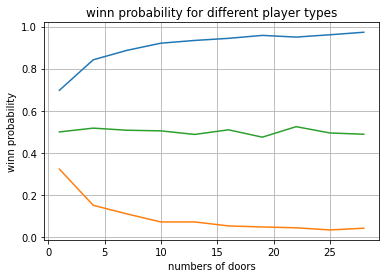

In [262]:
porte = np.arange(1,n,3)
plt.plot(porte, np.array(p_winn_s))
plt.plot(porte, np.array(p_winn_c))
plt.plot(porte, np.array(p_winn_n))
plt.xlabel("numbers of doors")
plt.ylabel("winn probability")
plt.title("winn probability for different player types")
plt.grid()
plt.show()